In [1]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()

In [2]:
#EYES CLOSE DATA
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Feature_array_EC_norm.p", "rb") as fp:   
    Feature_array_EC_norm = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Sub_idx_EC", "rb") as fp:  
    Sub_idx_EC = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/namesec.txt", "rb") as fp:  
    Old_EC = pickle.load(fp)

In [3]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [4]:
xCorr= []
for i in Sub_idx_EC:
    hename = Old_EC[int(i)]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [5]:
newdata = []
for e in Feature_array_EC_norm:
    d = []
    d.append(e[0])
    d.append(e[2])
    newdata.append(d)

In [6]:
#Data
X=np.array(newdata)
#X2=np.array(Feature_array_EC_norm)
print(type(X))
print(type(X[0]))
print(X.shape)
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(type(Y[0]))
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LinearRegression

In [10]:
#LinearRegression
for i in range(1,8):
    print("****************************************************")
    print('0.'+str(i)+'************************************************')
    numpase = 0
    accur = []
    xin = []
    for t in range(0,50):

        print("     ****************************************************")
        c = list(zip(X, Y))

        random.shuffle(c)

        DX, DY = zip(*c)
        X_train, X_test, y_train, y_test = train_test_split(DX, DY, test_size=float('0.'+str(i)))
        X_train = (X_train - np.mean(X_train)) / np.std(X_train)
        X_test = (X_test - np.mean(X_test)) / np.std(X_test)

        '''Normalize there X_train, X_test <- for across patiens mean and str (of each patient)'''
        #plotbars and mean and str (with the results) - See visualy what is hapening

        # Create an object, or instance, of the class.
        clf = linear_model.LinearRegression()
        # Train it
        #fitting (learning) the parameters of a model in sklearn is fit(X, y).
        print(clf.fit(X_train, y_train))
        clf.coef_
        clf.intercept_
        clf.score(X_train, y_train)
        #predict the class of the test data
        #sklearn is predict(X)
        prediction = (clf.predict(X_test))
        if float(round(sm.mean_absolute_error(y_test, prediction)))<0.75:
            print('     Predictet: {}\n'.format(prediction) )
            print('     What it should be: ', y_test)
            # Then, compute the classification accuracy obtained.
            print("     Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
            print("     Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
            print("     Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
            print("     Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
            print("     R2 score =", round(sm.r2_score(y_test, prediction), 2))
            print(' ')
            print(' ')
            print('     -------------- ')
            numpase=numpase+1
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
            xin.append(str(t))
        else:
            print('     Bad accu')
            xin.append(str(t))
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
    if numpase>25:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(xin,accur)
        plt.show()
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    
    print('Num de acc que pasa de 0.5: ',numpase)

****************************************************
0.1************************************************
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()
     Bad accu
     ****************************************************
LinearRegression()

In [13]:
Lavels2 = []
X2=[]
r=0
for i  in range(0,len(xCorr)):
    if xCorr[i]>4.5 and r<26:
        Lavels2.append(int(0))
        X2.append(newdata[i])
        r=r+1
    if xCorr[i]<=4.5:
        Lavels2.append(int(1))
        X2.append(newdata[i])

Y2 = np.array(Lavels2)
#Data
X2=np.array(X2)
print(Lavels2.count(0))
print(Lavels2.count(1))

Linear SVC

In [35]:
#Linear SVC
for i in range(1,8):
    print("**************************************************** 0."+str(i))
    numpase = 0
    accur = []
    xin = []
    for t in range(0,50):

        print("     --")
        c = list(zip(X2, Y2))

        random.shuffle(c)

        DX, DY = zip(*c)
        X_train, X_test, y_train, y_test = train_test_split(DX, DY, test_size=float('0.'+str(i)))
        X_train = (X_train - np.mean(X_train)) / np.std(X_train)
        X_test = (X_test - np.mean(X_test)) / np.std(X_test)

        # Create an object, or instance, of the class.
        # Train it
        # Adjust the parameters so it can predict the correct class as accurately.
        '''clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.00001,
                        C=1.0, multi_class='crammer_singer', fit_intercept=True,
                        intercept_scaling=1, class_weight=None, verbose=0,
                        random_state=None, max_iter=100000)'''
        clf = LinearSVC(penalty='l2', multi_class='crammer_singer',)
        #fitting (learning) the parameters of a model in sklearn is fit(X, y).
        print(clf.fit(X_train, y_train))
        clf.coef_
        clf.intercept_
        clf.score(X_train, y_train)
        #predict the class of the test data
        #sklearn is predict(X)
        prediction = (clf.predict(X_test))
        try:
            if float(accuracy_score(y_test, prediction))>0.6:
                print('     Predictet: {}'.format(prediction) )
                print('     El q ha de ser: ',y_test)
                # Then, compute the classification accuracy obtained.
                print('     Accuracy: ', accuracy_score(y_test, prediction))

                print('     Roc: ',roc_auc_score(y_test, prediction))

                print('     Recall: ',recall_score(y_test, prediction))
                print(' ')
                numpase=numpase+1
                accur.append(float(accuracy_score(y_test, prediction)))
                xin.append(str(t))
            else:
                print('     Bad accu')
    
        except:
            print('     Noroc curve')
    if numpase>25:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(xin,accur)
        plt.show()
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    print('Num de acc que pasa de 0.5: ',numpase)

**************************************************** 0.1
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [0 0 0 0 0]
     El q ha de ser:  [0, 0, 0, 0, 1]
     Accuracy:  0.8
     Roc:  0.5
     Recall:  0.0
 
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [0 0 0 0 0]
     El q ha de ser:  [0, 0, 0, 0, 0]
     Accuracy:  1.0
     Noroc curve
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [

In [36]:
#https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png 

for i in range(1,8):
    print("****************************************************")
    print('0.'+str(i))
    numpase = 0
    accur = []
    xin = []
    for t in range(0,50):

        print("     --")
        c = list(zip(X2, Y2))

        random.shuffle(c)

        DX, DY = zip(*c)
        DX = np.array(DX)
        DY = np.array(DY)
        trainX, testX, trainY, testY = train_test_split(DX, DY, test_size=float('0.'+str(i)))
        xgb_model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=50,
                                        objective='binary:logistic',booster='gbtree',n_jobs=10,
                                        subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                        reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                        scale_pos_weight=1)
        xgb_model.fit(trainX,trainY)
        predY = xgb_model.predict(testX)
        if float(accuracy_score(y_true=testY, y_pred=predY))>0.6:
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC",accuracy_score(y_true=testY, y_pred=predY))
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            numpase=numpase+1
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
            xin.append(str(t))
        else:
            print('     Bad accu')
            xin.append(str(t))
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
    if numpase>25:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(xin,accur)
        plt.show()
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    
    print('Num de acc que pasa de 0.5: ',numpase)

****************************************************
0.1
     --
     Pred:  [1 0 0 0 1]
     Data:  [1 0 0 0 1]
     ACC 1.0
     F1 1.0
     Recal 1.0
     Precision 1.0
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0]
     Data:  [0 0 0 0 0]
     ACC 1.0
     F1 0.0
     Recal 0.0
     Precision 0.0
     --
     Bad accu
     --
     Pred:  [0 0 0 1 1]
     Data:  [1 0 0 1 1]
     ACC 0.8
     F1 0.8
     Recal 0.6666666666666666
     Precision 1.0
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0]
     Data:  [0 0 0 1 0]
     ACC 0.8
     F1 0.0
     Recal 0.0
     Precision 0.0
     --
     Pred:  [1 0 0 0 1]
     Data:  [1 0 1 0 1]
     ACC 0.8
     F1 0.8
     Recal 0.6666666666666666
     Precision 1.0
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --


In [20]:
newdata2 = []
for e in range(0,len(Feature_array_EC_norm)):
    d = []
    d.append(Feature_array_EC_norm[e,0])
    d.append(Feature_array_EC_norm[e,2])
    newdata2.append(d)
newdata2 = np.array(newdata2)

In [21]:
import plotly.express as px
from sklearn.decomposition import PCA

Lavels3 = []
X3=[]
r=0
for i  in range(0,len(xCorr)):
    if xCorr[i]>4.5:# and r<20:
        Lavels3.append(int(0))
        X3.append(newdata2[i])
        r=r+1
    if xCorr[i]<=4.5:
        Lavels3.append(int(1))
        X3.append(newdata2[i])

Y3 = np.array(Lavels3)
#Data
X3=np.array(X3)
pca = PCA()
components = pca.fit_transform(X3)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=Y3
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [22]:
print(pca.components_)

print(pca.explained_variance_)


[[-0.99998536 -0.00541133]
 [-0.00541133  0.99998536]]
[0.1012537  0.00422903]


(-1.1, 1.1, 0.5593574519319278, 1.020982978479432)

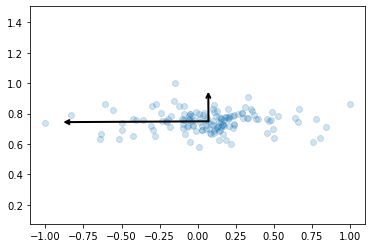

In [23]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(newdata2[:, 0], newdata2[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')